# Modeling
The modeling phase of this project consists of 2 approaches of learning, in which we plan to test and grid search among the best and most accurate model. below we are going to develope the theoretical foundations of these algorithms:

- Regression, for regression we are using these machine learning algorithms, train the model based on the best hyperparameter combination and finally select the most accurate model.
    - multiple linear regression
    - polynomial regression
    - ridge
    - lasso
    - support vector machine
    - k-nearest neighbor
    - decision tree
    - random forest
- binary-class classification, we have 2 classification problems in this project, one binary classification, one multi class classification, implemented algorithms for classification will be these algorithms:
    - logistic regression
    - k-nearest neighbor
    - decision tree
    - support vector machine
    - gradient boosting
- for unsupervised learning and clusteirng approach of this project we will implement density-based clusteirng and DBSCAN algorithm.
----

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import warnings
import matplotlib
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 200)
import seaborn as sns
from openpyxl import load_workbook
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from tqdm import tqdm

In [64]:
xls = pd.ExcelFile('data/Main Dataset V3.0 .xlsx')
ad_post = pd.read_excel(xls, 'Ad-Post')
ad_story = pd.read_excel(xls, 'Ad-Story')
influencer = pd.read_excel(xls, 'Influencer')
leaders_post = pd.read_excel(xls, 'Leaders-Post')
leaders_story = pd.read_excel(xls, 'Leaders-Story')
post = pd.read_excel(xls, 'Post')
story = pd.read_excel(xls, 'Story')
print('Datasets Loaded Completely.')

Datasets Loaded Completely.


since there are some categorical variables, we need to address them before using them for training the models based on them, since we are using multiple approaches thus the encoding approach can be different. for instance when we are using algorithms based on tree, label encoding is better than one hot encoding. on that circumstances, we are implementing different encoding and use the apropriate one for modeling technique.

In [65]:
#dummying dataset

# advertising posts
dummy_field = pd.get_dummies(ad_post['field'], prefix='field')
ad_post_dummy = pd.concat([ad_post, dummy_field], axis=1)
ad_post_dummy.drop(['field'], axis=1, inplace=True)

# advertising stories
dummy_field = pd.get_dummies(ad_story['field'], prefix='field')
ad_story_dummy = pd.concat([ad_story, dummy_field], axis=1)
ad_story_dummy.drop(['field'], axis=1, inplace=True)

#influencer
dummy_gender = pd.get_dummies(influencer['gender'], prefix='gender')
dummy_field = pd.get_dummies(influencer['field'], prefix='field')
influencer_dummy = pd.concat([influencer, dummy_gender, dummy_field], axis=1)
influencer_dummy.drop(['gender', 'field'], axis=1, inplace=True)

#leaders posts
dummy_gender = pd.get_dummies(leaders_post['gender'], prefix='gender')
leaders_post_dummy = pd.concat([leaders_post, dummy_gender], axis=1)
leaders_post_dummy.drop(['gender'], axis=1, inplace=True)

In [66]:
# label encoding dataset

# advertising posts
labels, _ = pd.factorize(ad_post['field'])
ad_post_labelencoded = ad_post
ad_post_labelencoded['field_labelencoded'] = labels.tolist()

# advertising stories
labels, _ = pd.factorize(ad_story['field'])
ad_story_labelencoded = ad_story
ad_story_labelencoded['field_labelencoded'] = labels.tolist()

# influencer
labels, _ = pd.factorize(influencer['gender'])
influencer_labelencoded = influencer
influencer_labelencoded['gender_labelencoded'] = labels.tolist()
labels, _ = pd.factorize(influencer['field'])
influencer_labelencoded['field_labelencoded'] = labels.tolist()

# leaders post
labels, _ = pd.factorize(leaders_post['gender'])
leaders_post_labelencoded = leaders_post
leaders_post_labelencoded['gender_labelencoded'] = labels.tolist()

## Regression
### Multiple Linear Regression
#### Advertising Posts

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
ad_post_y = np.asarray(ad_post_dummy['cost'])
ad_post_x = np.asarray(ad_post_dummy.loc[:, ['follower', 'view', 'threshold', 'field_art & culture', 'field_fact', 'field_video', 'field_video']])

In [69]:
temp_lst = []
for i in tqdm(range(2, 10)):
    kf = KFold(n_splits = i)
    for train_index, test_index in kf.split(ad_post_x):
        X_train, X_test = ad_post_x[train_index], ad_post_x[test_index]
        y_train, y_test = ad_post_y[train_index], ad_post_y[test_index]
        reg_lr_unnormalize = LinearRegression()
        reg_lr_normalize = LinearRegression(normalize=True)
        reg_lr_unnormalize.fit(X_train, y_train)
        reg_lr_normalize.fit(X_train, y_train)
        temp_lst2 = []
        temp_lst2.append(i)
        temp_lst2.append(reg_lr_unnormalize.score(X_train, y_train))
        temp_lst2.append(reg_lr_normalize.score(X_train, y_train))
        temp_lst2.append(reg_lr_unnormalize.score(X_test, y_test))
        temp_lst2.append(reg_lr_normalize.score(X_test, y_test))
        temp_lst.append(temp_lst2)

temp_df = pd.DataFrame(temp_lst, columns=['k', 'Unnormalized Train Score', 'Normalized Train Score', 'Unnormalized Test Score', 'Normalized Test Score'])

temp_lst = []
for k in range(2, 10):
    temp_lst2 = []
    temp_lst2.append(k)
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Unnormalized Train Score']), decimals=4))
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Normalized Train Score']), decimals=4))
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Unnormalized Test Score']), decimals=4))
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Normalized Test Score']), decimals=4))
    temp_lst.append(temp_lst2)

reg_lr_eval_df = pd.DataFrame(temp_lst, columns=['k', 'Unnormalized Train Score', 'Normalized Train Score', 'Unnormalized Test Score', 'Normalized Test Score'])
reg_lr_eval_df

100%|██████████| 8/8 [00:00<00:00, 92.20it/s]


,k,Unnormalized Train Score,Normalized Train Score,Unnormalized Test Score,Normalized Test Score
0,2,0.95,0.95,0.71,0.71
1,3,0.93,0.93,0.77,0.77
2,4,0.93,0.93,0.48,0.48
3,5,0.93,0.93,0.54,0.54
4,6,0.92,0.92,0.35,0.35
5,7,0.92,0.92,0.05,0.05
6,8,0.92,0.92,-0.04,-0.04
7,9,0.92,0.92,-3.50,-3.50


as you can see the best model for linear regression was 3-folded with accuracy of 77% in test dataset. in the cell below we are going to implement this as final model, also normalizing data wouldn't affect the overall accuracy so we dont normalize data.

In [70]:
kf = KFold(n_splits = 3)
reg_lr = LinearRegression()
for train_index, test_index in kf.split(ad_post_x):
    X_train, X_test = ad_post_x[train_index], ad_post_x[test_index]
    y_train, y_test = ad_post_y[train_index], ad_post_y[test_index]
    reg_lr.fit(X_train, y_train)

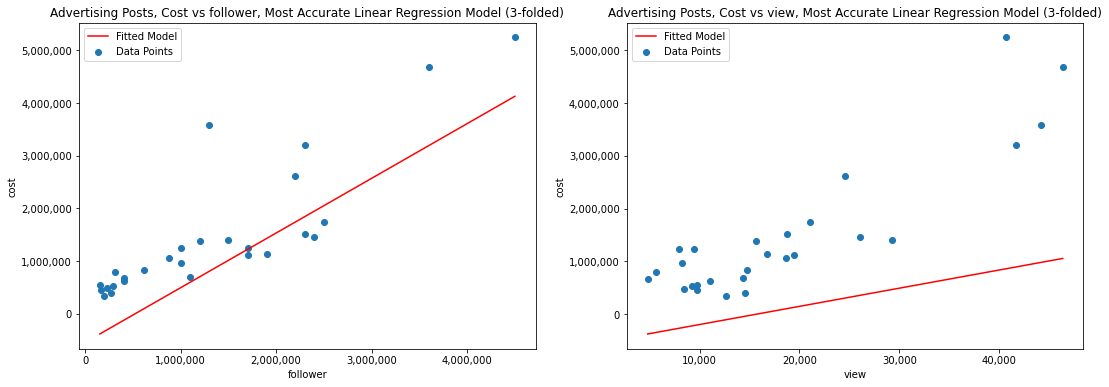

In [71]:
fig = plt.figure(figsize = (18, 6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

axs = [ax1, ax2]
feature_lst = ['follower', 'view']

for ax, feature in zip(axs, feature_lst):
    ax.scatter(ad_post_dummy[feature], ad_post_dummy['cost'], label='Data Points')
    X_plot = np.arange(ad_post_dummy[feature].min(), ad_post_dummy[feature].max() , 1)
    y_plot = reg_lr.coef_[axs.index(ax)] * X_plot + reg_lr.intercept_
    ax.plot(X_plot, y_plot, '-r', label='Fitted Model')
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.set_title(f'Advertising Posts, Cost vs {feature}, Most Accurate Linear Regression Model (3-folded)')
    ax.set_xlabel(feature)
    ax.set_ylabel('cost')
    ax.legend()
plt.show()

#### Advertising Stories

In [72]:
ad_story_y = np.asarray(ad_story_dummy['cost'])
ad_story_x = np.asarray(ad_story_dummy.loc[:, ['view', 'follower', 'action', 'interaction', 'impression', 'field_art & culture', 'field_fact', 'field_health',
                                               'field_news', 'field_video', 'field_women']])

In [73]:
temp_lst = []
for i in tqdm(range(2, 10)):
    kf = KFold(n_splits = i)
    for train_index, test_index in kf.split(ad_story_x):
        X_train, X_test = ad_story_x[train_index], ad_story_x[test_index]
        y_train, y_test = ad_story_y[train_index], ad_story_y[test_index]
        reg_lr_unnormalize = LinearRegression()
        reg_lr_normalize = LinearRegression(normalize=True)
        reg_lr_unnormalize.fit(X_train, y_train)
        reg_lr_normalize.fit(X_train, y_train)
        temp_lst2 = []
        temp_lst2.append(i)
        temp_lst2.append(reg_lr_unnormalize.score(X_train, y_train))
        temp_lst2.append(reg_lr_normalize.score(X_train, y_train))
        temp_lst2.append(reg_lr_unnormalize.score(X_test, y_test))
        temp_lst2.append(reg_lr_normalize.score(X_test, y_test))
        temp_lst.append(temp_lst2)

temp_df = pd.DataFrame(temp_lst, columns=['k', 'Unnormalized Train Score', 'Normalized Train Score', 'Unnormalized Test Score', 'Normalized Test Score'])

temp_lst = []
for k in range(2, 10):
    temp_lst2 = []
    temp_lst2.append(k)
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Unnormalized Train Score']), decimals=4))
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Normalized Train Score']), decimals=4))
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Unnormalized Test Score']), decimals=4))
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Normalized Test Score']), decimals=4))
    temp_lst.append(temp_lst2)

reg_lr_eval_df = pd.DataFrame(temp_lst, columns=['k', 'Unnormalized Train Score', 'Normalized Train Score', 'Unnormalized Test Score', 'Normalized Test Score'])
reg_lr_eval_df

100%|██████████| 8/8 [00:00<00:00, 82.66it/s]


,k,Unnormalized Train Score,Normalized Train Score,Unnormalized Test Score,Normalized Test Score
0,2,1.00,1.00,0.92,0.93
1,3,1.00,1.00,0.96,0.96
2,4,1.00,1.00,0.91,0.91
3,5,1.00,1.00,0.91,0.91
4,6,1.00,1.00,0.62,0.62
5,7,1.00,1.00,0.80,0.80
6,8,1.00,1.00,0.79,0.79
7,9,1.00,1.00,0.75,0.75


as you can see in the table above, the best performing and most accurate multiple linear regression is a 3-folded one with train accuracy of 100% and test accuracy of 96%. Thus we implement a model based on this circumstances and use it to predict further costs of advertising stories. like advertising posts, normalizing values in this model is not a deciding factor regarding the accuracy, so we don't normalize values.

In [74]:
kf = KFold(n_splits = 3)
reg_lr = LinearRegression()
for train_index, test_index in kf.split(ad_post_x):
    X_train, X_test = ad_story_x[train_index], ad_story_x[test_index]
    y_train, y_test = ad_story_y[train_index], ad_story_y[test_index]
    reg_lr.fit(X_train, y_train)

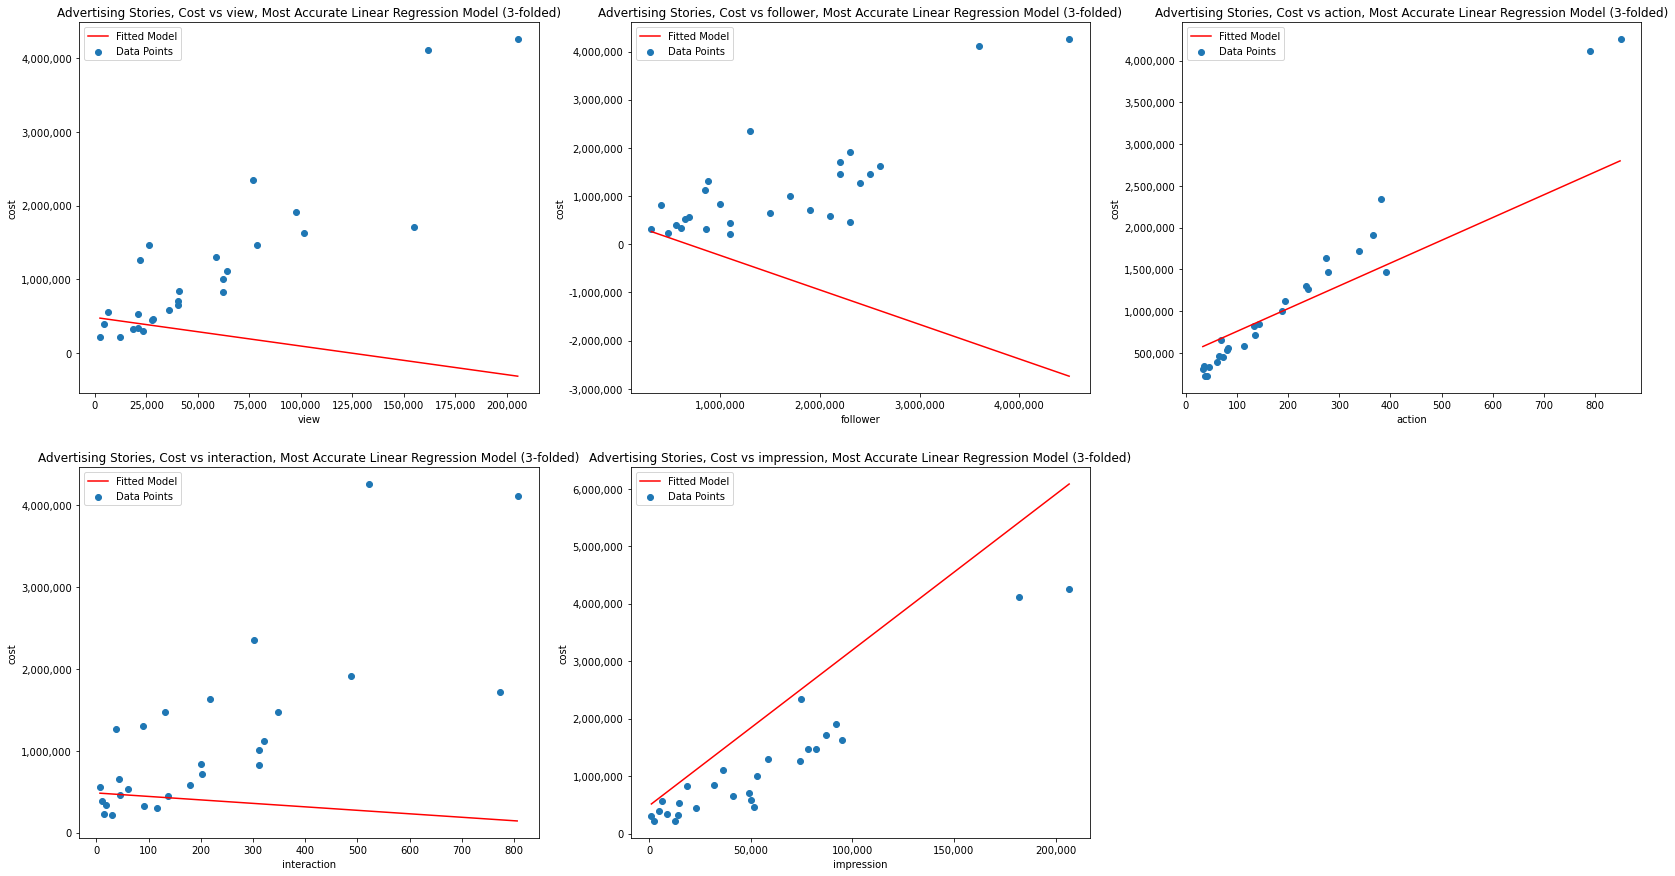

In [75]:
fig = plt.figure(figsize = (28, 15))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)


axs = [ax1, ax2, ax3, ax4, ax5]
feature_lst = ['view', 'follower', 'action', 'interaction', 'impression']

for ax, feature in zip(axs, feature_lst):
    ax.scatter(ad_story_dummy[feature], ad_story_dummy['cost'], label='Data Points')
    X_plot = np.arange(ad_story_dummy[feature].min(), ad_story_dummy[feature].max() , 1)
    y_plot = reg_lr.coef_[axs.index(ax)] * X_plot + reg_lr.intercept_
    ax.plot(X_plot, y_plot, '-r', label='Fitted Model')
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.set_title(f'Advertising Stories, Cost vs {feature}, Most Accurate Linear Regression Model (3-folded)')
    ax.set_xlabel(feature)
    ax.set_ylabel('cost')
    ax.legend()
plt.show()

#### Influencers

In [76]:
influencer_y = np.asarray(influencer_dummy['cost'])
influencer_x = np.asarray(influencer_dummy.loc[:, ['follower', 'view', 'action', 'impression', 'cta', 'interaction', 'gender_family', 'gender_female',
                                                  'gender_male', 'field_cooking', 'field_health', 'field_lifestyle', 'field_sport', 'field_tourism']])

In [77]:
temp_lst = []
for i in tqdm(range(2, 10)):
    kf = KFold(n_splits = i)
    for train_index, test_index in kf.split(influencer_x):
        X_train, X_test = influencer_x[train_index], influencer_x[test_index]
        y_train, y_test = influencer_y[train_index], influencer_y[test_index]
        reg_lr_unnormalize = LinearRegression()
        reg_lr_normalize = LinearRegression(normalize=True)
        reg_lr_unnormalize.fit(X_train, y_train)
        reg_lr_normalize.fit(X_train, y_train)
        temp_lst2 = []
        temp_lst2.append(i)
        temp_lst2.append(reg_lr_unnormalize.score(X_train, y_train))
        temp_lst2.append(reg_lr_normalize.score(X_train, y_train))
        temp_lst2.append(reg_lr_unnormalize.score(X_test, y_test))
        temp_lst2.append(reg_lr_normalize.score(X_test, y_test))
        temp_lst.append(temp_lst2)

temp_df = pd.DataFrame(temp_lst, columns=['k', 'Unnormalized Train Score', 'Normalized Train Score', 'Unnormalized Test Score', 'Normalized Test Score'])

temp_lst = []
for k in range(2, 10):
    temp_lst2 = []
    temp_lst2.append(k)
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Unnormalized Train Score']), decimals=4))
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Normalized Train Score']), decimals=4))
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Unnormalized Test Score']), decimals=4))
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Normalized Test Score']), decimals=4))
    temp_lst.append(temp_lst2)

reg_lr_eval_df = pd.DataFrame(temp_lst, columns=['k', 'Unnormalized Train Score', 'Normalized Train Score', 'Unnormalized Test Score', 'Normalized Test Score'])
reg_lr_eval_df

100%|██████████| 8/8 [00:00<00:00, 51.09it/s]


,k,Unnormalized Train Score,Normalized Train Score,Unnormalized Test Score,Normalized Test Score
0,2,0.87,0.87,0.22,0.25
1,3,0.88,0.88,-0.37,-0.38
2,4,0.85,0.85,-0.17,-0.17
3,5,0.85,0.85,-0.30,-0.30
4,6,0.85,0.85,-0.13,-0.13
5,7,0.84,0.84,-1.00,-1.01
6,8,0.85,0.85,-0.58,-0.58
7,9,0.84,0.84,-1.93,-1.93


as you can see above, the multiple linear regression model is underfitted to the data to a very large extreme. this dataset is not acting linearly so linear regression wouldn't fit to it, thus this approach is not good for this situation. on that circumstances, we wont go any further with multiple linear regression for this dataset since it's not a appropriate fit.

#### Leaders Posts

In [78]:
leaders_post_y = np.asarray(leaders_post_dummy['cost'])
leaders_post_x = np.asarray(leaders_post_dummy.loc[:, ['follower', 'view', 'like', 'comment', 'share', 'save', 'profile_visit', 'reach', 'impression',
                                                      'gender_family', 'gender_female', 'gender_male']])

In [79]:
temp_lst = []
for i in tqdm(range(2, 10)):
    kf = KFold(n_splits = i)
    for train_index, test_index in kf.split(leaders_post_x):
        X_train, X_test = leaders_post_x[train_index], leaders_post_x[test_index]
        y_train, y_test = leaders_post_y[train_index], leaders_post_y[test_index]
        reg_lr_unnormalize = LinearRegression()
        reg_lr_normalize = LinearRegression(normalize=True)
        reg_lr_unnormalize.fit(X_train, y_train)
        reg_lr_normalize.fit(X_train, y_train)
        temp_lst2 = []
        temp_lst2.append(i)
        temp_lst2.append(reg_lr_unnormalize.score(X_train, y_train))
        temp_lst2.append(reg_lr_normalize.score(X_train, y_train))
        temp_lst2.append(reg_lr_unnormalize.score(X_test, y_test))
        temp_lst2.append(reg_lr_normalize.score(X_test, y_test))
        temp_lst.append(temp_lst2)

temp_df = pd.DataFrame(temp_lst, columns=['k', 'Unnormalized Train Score', 'Normalized Train Score', 'Unnormalized Test Score', 'Normalized Test Score'])

temp_lst = []
for k in range(2, 10):
    temp_lst2 = []
    temp_lst2.append(k)
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Unnormalized Train Score']), decimals=4))
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Normalized Train Score']), decimals=4))
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Unnormalized Test Score']), decimals=4))
    temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k)]['Normalized Test Score']), decimals=4))
    temp_lst.append(temp_lst2)

reg_lr_eval_df = pd.DataFrame(temp_lst, columns=['k', 'Unnormalized Train Score', 'Normalized Train Score', 'Unnormalized Test Score', 'Normalized Test Score'])
reg_lr_eval_df

100%|██████████| 8/8 [00:00<00:00, 75.31it/s]


,k,Unnormalized Train Score,Normalized Train Score,Unnormalized Test Score,Normalized Test Score
0,2,1.00,1.00,-119.27,-3.67
1,3,1.00,1.00,-51.77,-331.70
2,4,1.00,1.00,-200198.36,-673.05
3,5,1.00,1.00,-1440.19,-988.99
4,6,1.00,1.00,-1770.67,-1317.02
5,7,1.00,1.00,-2655.51,-1974.55
6,8,1.00,1.00,-52.77,-1.06
7,9,1.00,1.00,nan,nan


as you can see, this dataset is underfitted to the multiple linear regression model too. the amount of underfitting is significance as you can see the difference between the training error and test error is very large. this indicates that multiple linear regression is not good fit for this dataset, the other reason for this behavior is also the small number of record available in this dataset.

-----

### Polynomial Regression

another approach of regression porblems is polynomial regression. we are going to use only one independent variable for predicting the dependent variable. the independent variable of choice is view since it's the main performance metric.

#### Advertising Posts

In [80]:
from sklearn.preprocessing import PolynomialFeatures

In [81]:
ad_post_x = np.asarray(ad_post[['view']])
ad_post_y = np.asarray(ad_post[['cost']])

In [82]:
temp_lst = []
for i in tqdm(range(2, 10)):
    kf = KFold(n_splits = i)
    for train_index, test_index in kf.split(ad_post_x):
        X_train, X_test = ad_post_x[train_index], ad_post_x[test_index]
        y_train, y_test = ad_post_y[train_index], ad_post_y[test_index]
        for j in range(2, 6):
            poly = PolynomialFeatures(degree=j)
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.fit_transform(X_test)
            reg_lr_unnormalize = LinearRegression()
            reg_lr_normalize = LinearRegression(normalize=True)
            reg_lr_unnormalize.fit(X_train_poly, y_train)
            reg_lr_normalize.fit(X_train_poly, y_train)
            temp_lst2 = []
            temp_lst2.append(j)
            temp_lst2.append(i)
            temp_lst2.append(reg_lr_unnormalize.score(X_train_poly, y_train))
            temp_lst2.append(reg_lr_normalize.score(X_train_poly, y_train))
            temp_lst2.append(reg_lr_unnormalize.score(X_test_poly, y_test))
            temp_lst2.append(reg_lr_normalize.score(X_test_poly, y_test))
            temp_lst.append(temp_lst2)

temp_df = pd.DataFrame(temp_lst, columns=['polynomial degree', 'k', 'Unnormalized Train Score', 'Normalized Train Score', 'Unnormalized Test Score', 'Normalized Test Score'])

temp_lst = []
for k in range(2, 10):
    for c in range(2, 6):
        temp_lst2 = []
        temp_lst2.append(c)
        temp_lst2.append(k)
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['polynomial degree'] == c)]['Unnormalized Train Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['polynomial degree'] == c)]['Normalized Train Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['polynomial degree'] == c)]['Unnormalized Test Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['polynomial degree'] == c)]['Normalized Test Score']), decimals=4))
        temp_lst.append(temp_lst2)

reg_lr_eval_df = pd.DataFrame(temp_lst, columns=['polynomial degree', 'k', 'Unnormalized Train Score', 'Normalized Train Score', 'Unnormalized Test Score', 'Normalized Test Score'])
reg_lr_eval_df

100%|██████████| 8/8 [00:00<00:00, 18.81it/s]


,polynomial degree,k,Unnormalized Train Score,Normalized Train Score,Unnormalized Test Score,Normalized Test Score
0,2,2,0.91,0.91,0.39,0.39
1,3,2,0.92,0.92,-0.05,-0.05
2,4,2,0.94,0.95,-0.44,-3.16
3,5,2,0.94,0.95,-0.92,0.18
4,2,3,0.86,0.86,0.70,0.70
5,3,3,0.87,0.87,0.62,0.62
6,4,3,0.89,0.90,0.37,0.29
7,5,3,0.90,0.92,0.32,-0.27
8,2,4,0.85,0.85,0.34,0.34
9,3,4,0.86,0.86,0.29,0.29


as you can see in the table above, the most accurate polynomial linear regression model is 3-folded second degree polynomial model which scored 86% in training dataset and 70& in test dataset. it's worthy to mention that simple 3-folded multiple linear regression managed to achieve 93% in training set and 77% in test dataset. since this performance is not very bad, it's worth to plot the learned equation on dataset.

In [83]:
kf = KFold(n_splits = 3)
reg_lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(ad_post_x)
reg_lr.fit(X_train_poly, ad_post_y)

LinearRegression()

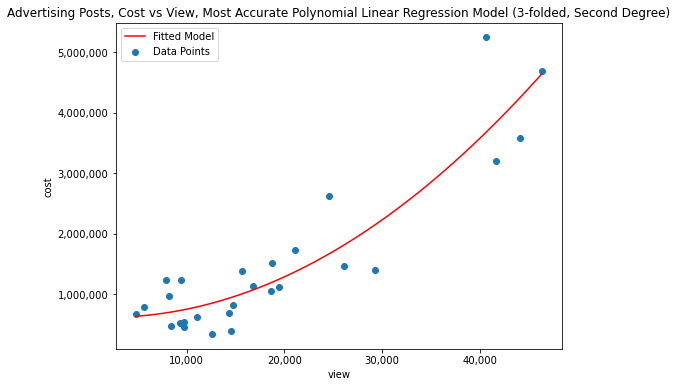

In [84]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

ax.scatter(ad_post_dummy['view'], ad_post_dummy['cost'], label='Data Points')
X_plot = np.arange(ad_post_dummy['view'].min(), ad_post_dummy['view'].max() , 1)
y_plot = reg_lr.intercept_[0] + reg_lr.coef_[0][1]*X_plot+ reg_lr.coef_[0][2]*np.power(X_plot, 2)
ax.plot(X_plot, y_plot, '-r', label='Fitted Model')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title(f'Advertising Posts, Cost vs View, Most Accurate Polynomial Linear Regression Model (3-folded, Second Degree)')
ax.set_xlabel('view')
ax.set_ylabel('cost')
ax.legend()
plt.show()

#### Advertising stories

In [99]:
ad_story_x = np.asarray(ad_story[['view']])
ad_story_y = np.asarray(ad_story[['cost']])

In [86]:
temp_lst = []
for i in tqdm(range(2, 10)):
    kf = KFold(n_splits = i)
    for train_index, test_index in kf.split(ad_story_x):
        X_train, X_test = ad_story_x[train_index], ad_story_x[test_index]
        y_train, y_test = ad_story_y[train_index], ad_story_y[test_index]
        for j in range(2, 6):
            poly = PolynomialFeatures(degree=j)
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.fit_transform(X_test)
            reg_lr_unnormalize = LinearRegression()
            reg_lr_normalize = LinearRegression(normalize=True)
            reg_lr_unnormalize.fit(X_train_poly, y_train)
            reg_lr_normalize.fit(X_train_poly, y_train)
            temp_lst2 = []
            temp_lst2.append(j)
            temp_lst2.append(i)
            temp_lst2.append(reg_lr_unnormalize.score(X_train_poly, y_train))
            temp_lst2.append(reg_lr_normalize.score(X_train_poly, y_train))
            temp_lst2.append(reg_lr_unnormalize.score(X_test_poly, y_test))
            temp_lst2.append(reg_lr_normalize.score(X_test_poly, y_test))
            temp_lst.append(temp_lst2)

temp_df = pd.DataFrame(temp_lst, columns=['polynomial degree', 'k', 'Unnormalized Train Score', 'Normalized Train Score', 'Unnormalized Test Score', 'Normalized Test Score'])

temp_lst = []
for k in range(2, 10):
    for c in range(2, 6):
        temp_lst2 = []
        temp_lst2.append(c)
        temp_lst2.append(k)
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['polynomial degree'] == c)]['Unnormalized Train Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['polynomial degree'] == c)]['Normalized Train Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['polynomial degree'] == c)]['Unnormalized Test Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['polynomial degree'] == c)]['Normalized Test Score']), decimals=4))
        temp_lst.append(temp_lst2)

reg_lr_eval_df = pd.DataFrame(temp_lst, columns=['polynomial degree', 'k', 'Unnormalized Train Score', 'Normalized Train Score', 'Unnormalized Test Score', 'Normalized Test Score'])
reg_lr_eval_df

100%|██████████| 8/8 [00:00<00:00, 20.05it/s]


,polynomial degree,k,Unnormalized Train Score,Normalized Train Score,Unnormalized Test Score,Normalized Test Score
0,2,2,0.81,0.81,0.80,0.80
1,3,2,0.82,0.82,0.71,0.71
2,4,2,0.86,0.87,-15.67,-29.62
3,5,2,0.89,0.92,-89.33,-202.46
4,2,3,0.81,0.81,0.74,0.74
5,3,3,0.81,0.81,0.72,0.72
6,4,3,0.83,0.84,-6.75,-18.31
7,5,3,0.86,0.88,-62.54,-155.78
8,2,4,0.81,0.81,0.41,0.41
9,3,4,0.82,0.82,0.21,0.21


as you can see in the table above the best performing and most accurate polynomial linear regression model is 2-folded second degree with 80% accuracy. although this models is not better performing than multiple linear regression, since it has mediocre performance, it's good to plot it.

In [100]:
kf = KFold(n_splits = 2)
reg_lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(ad_story_x)
reg_lr.fit(X_train_poly, ad_story_y)

LinearRegression()

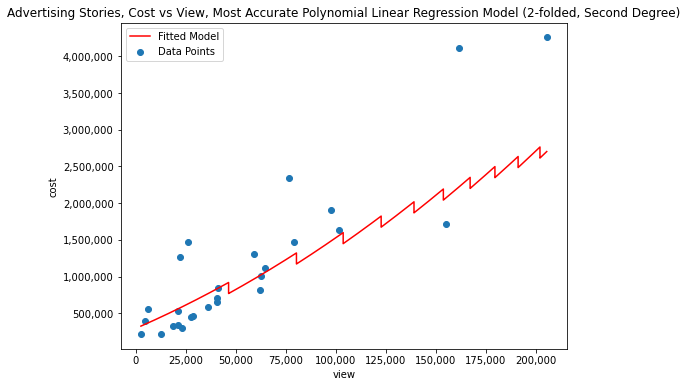

In [101]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

ax.scatter(ad_story_dummy['view'], ad_story_dummy['cost'], label='Data Points')
X_plot = np.arange(ad_story_dummy['view'].min(), ad_story_dummy['view'].max() , 1)
y_plot = reg_lr.intercept_[0] + reg_lr.coef_[0][1]*X_plot+ reg_lr.coef_[0][2]*np.power(X_plot, 2)
ax.plot(X_plot, y_plot, '-r', label='Fitted Model')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title(f'Advertising Stories, Cost vs View, Most Accurate Polynomial Linear Regression Model (2-folded, Second Degree)')
ax.set_xlabel('view')
ax.set_ylabel('cost')
ax.legend()
plt.show()

#### Influencer & Leaders Posts

In [27]:
influencer_x = np.asarray(influencer[['view']])
influencer_y = np.asarray(influencer[['cost']])
leaders_post_x = np.asarray(leaders_post[['view']])
leaders_post_y = np.asarray(leaders_post[['cost']])

In [28]:
temp_lst = []
for i in tqdm(range(2, 10)):
    kf = KFold(n_splits = i)
    for train_index, test_index in kf.split(influencer_x):
        X_train, X_test = influencer_x[train_index], influencer_x[test_index]
        y_train, y_test = influencer_y[train_index], influencer_y[test_index]
        for j in range(2, 6):
            poly = PolynomialFeatures(degree=j)
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.fit_transform(X_test)
            reg_lr_unnormalize = LinearRegression()
            reg_lr_normalize = LinearRegression(normalize=True)
            reg_lr_unnormalize.fit(X_train_poly, y_train)
            reg_lr_normalize.fit(X_train_poly, y_train)
            temp_lst2 = []
            temp_lst2.append(j)
            temp_lst2.append(i)
            temp_lst2.append(reg_lr_unnormalize.score(X_train_poly, y_train))
            temp_lst2.append(reg_lr_normalize.score(X_train_poly, y_train))
            temp_lst2.append(reg_lr_unnormalize.score(X_test_poly, y_test))
            temp_lst2.append(reg_lr_normalize.score(X_test_poly, y_test))
            temp_lst.append(temp_lst2)

temp_df = pd.DataFrame(temp_lst, columns=['polynomial degree', 'k', 'Unnormalized Train Score', 'Normalized Train Score', 'Unnormalized Test Score', 'Normalized Test Score'])

temp_lst = []
for k in range(2, 10):
    for c in range(2, 6):
        temp_lst2 = []
        temp_lst2.append(c)
        temp_lst2.append(k)
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['polynomial degree'] == c)]['Unnormalized Train Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['polynomial degree'] == c)]['Normalized Train Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['polynomial degree'] == c)]['Unnormalized Test Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['polynomial degree'] == c)]['Normalized Test Score']), decimals=4))
        temp_lst.append(temp_lst2)

reg_lr_eval_df = pd.DataFrame(temp_lst, columns=['polynomial degree', 'k', 'Unnormalized Train Score', 'Normalized Train Score', 'Unnormalized Test Score', 'Normalized Test Score'])
reg_lr_eval_df

100%|██████████| 8/8 [00:00<00:00, 14.72it/s]


,polynomial degree,k,Unnormalized Train Score,Normalized Train Score,Unnormalized Test Score,Normalized Test Score
0,2,2,0.63,0.63,-2.24,-2.24
1,3,2,0.69,0.69,-591.50,-591.50
2,4,2,0.69,0.70,-169.10,-162.66
3,5,2,0.71,0.79,-64832.53,-2873109.93
4,2,3,0.68,0.68,-1.45,-1.45
5,3,3,0.75,0.75,-432.58,-432.58
6,4,3,0.74,0.76,-8739.05,-8680.69
7,5,3,0.71,0.76,-4672.21,-62193.18
8,2,4,0.66,0.66,-0.83,-0.83
9,3,4,0.70,0.70,-370.84,-370.84


In [29]:
temp_lst = []
for i in tqdm(range(2, 10)):
    kf = KFold(n_splits = i)
    for train_index, test_index in kf.split(leaders_post_x):
        X_train, X_test = leaders_post_x[train_index], leaders_post_x[test_index]
        y_train, y_test = leaders_post_y[train_index], leaders_post_y[test_index]
        for j in range(2, 6):
            poly = PolynomialFeatures(degree=j)
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.fit_transform(X_test)
            reg_lr_unnormalize = LinearRegression()
            reg_lr_normalize = LinearRegression(normalize=True)
            reg_lr_unnormalize.fit(X_train_poly, y_train)
            reg_lr_normalize.fit(X_train_poly, y_train)
            temp_lst2 = []
            temp_lst2.append(j)
            temp_lst2.append(i)
            temp_lst2.append(reg_lr_unnormalize.score(X_train_poly, y_train))
            temp_lst2.append(reg_lr_normalize.score(X_train_poly, y_train))
            temp_lst2.append(reg_lr_unnormalize.score(X_test_poly, y_test))
            temp_lst2.append(reg_lr_normalize.score(X_test_poly, y_test))
            temp_lst.append(temp_lst2)

temp_df = pd.DataFrame(temp_lst, columns=['polynomial degree', 'k', 'Unnormalized Train Score', 'Normalized Train Score', 'Unnormalized Test Score', 'Normalized Test Score'])

temp_lst = []
for k in range(2, 10):
    for c in range(2, 6):
        temp_lst2 = []
        temp_lst2.append(c)
        temp_lst2.append(k)
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['polynomial degree'] == c)]['Unnormalized Train Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['polynomial degree'] == c)]['Normalized Train Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['polynomial degree'] == c)]['Unnormalized Test Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['polynomial degree'] == c)]['Normalized Test Score']), decimals=4))
        temp_lst.append(temp_lst2)

reg_lr_eval_df = pd.DataFrame(temp_lst, columns=['polynomial degree', 'k', 'Unnormalized Train Score', 'Normalized Train Score', 'Unnormalized Test Score', 'Normalized Test Score'])
reg_lr_eval_df

100%|██████████| 8/8 [00:00<00:00, 20.94it/s]


,polynomial degree,k,Unnormalized Train Score,Normalized Train Score,Unnormalized Test Score,Normalized Test Score
0,2,2,0.57,0.57,-0.42,-0.42
1,3,2,0.88,0.88,-81.40,-81.40
2,4,2,0.98,1.00,-3018.53,-196.74
3,5,2,1.00,1.00,-166901.68,-414.48
4,2,3,0.45,0.45,-1.23,-1.23
5,3,3,0.75,0.75,-34.79,-34.79
6,4,3,0.80,0.87,-52.14,-39.98
7,5,3,0.81,1.00,-72.69,-116315.32
8,2,4,0.42,0.42,-333.36,-333.36
9,3,4,0.60,0.60,-500.46,-500.46


like multiple linear regression, polynomial regression is also not a good fit for influencers and leaders posts dataset, so we omit training a model for them based on this algorithms

----

### Ridge & Lasso Regression

another regression we are going to investigate is ridge regression. these two algorithms have alpha as hyperparameter. this hyperparameter defines the strength of regularization for these algorithm, in order to find the optimal value for it we are going to use grid search technique.

In [30]:
from sklearn.linear_model import Ridge, Lasso

In [94]:
ad_post_y = np.asarray(ad_post_dummy[['cost']])
ad_post_x = np.asarray(ad_post_dummy[['follower', 'view', 'field_art & culture', 'field_fact', 'field_video', 'field_women']])

ad_story_y = np.asarray(ad_story_dummy[['cost']])
ad_story_x = np.asarray(ad_story_dummy[['view', 'follower', 'action', 'interaction', 'impression', 'field_art & culture', 'field_fact', 'field_health',
                                       'field_news', 'field_video', 'field_women']])

influencer_y = np.asarray(influencer_dummy[['cost']])
influencer_x = np.asarray(influencer_dummy[['follower', 'view', 'action', 'impression', 'cta', 'interaction', 'gender_family', 'gender_female', 'gender_male',
                                           'field_cooking', 'field_health', 'field_lifestyle', 'field_sport', 'field_tourism']])

leaders_post_y = np.asarray(leaders_post_dummy[['cost']])
leaders_post_x = np.asarray(leaders_post_dummy[['follower', 'view', 'like', 'comment', 'share', 'save', 'profile_visit', 'reach', 'impression', 'gender_family',
                                               'gender_female', 'gender_male']])

#### Advertising Posts

In [32]:
temp_lst = []
alphas = np.linspace(0, 1, 10)
for i in tqdm(range(2, 10)):
    kf = KFold(n_splits = i)
    for train_index, test_index in kf.split(ad_post_x):
        X_train, X_test = ad_post_x[train_index], ad_post_x[test_index]
        y_train, y_test = ad_post_y[train_index], ad_post_y[test_index]
        for a in alphas:
            ridge_reg = Ridge(alpha=a)
            lasso_reg = Lasso(alpha=a)
            ridge_reg.fit(X_train, y_train)
            lasso_reg.fit(X_train, y_train)
            temp_lst2 = []
            temp_lst2.append(i)
            temp_lst2.append(a)
            temp_lst2.append(ridge_reg.score(X_train, y_train))
            temp_lst2.append(lasso_reg.score(X_train, y_train))
            temp_lst2.append(ridge_reg.score(X_test, y_test))
            temp_lst2.append(lasso_reg.score(X_test, y_test))
            temp_lst.append(temp_lst2)

temp_df = pd.DataFrame(temp_lst, columns=['k', 'alpha', 'Ridge Train Score', 'Lasso Train Score', 'Ridge Test Score', 'Lasso Test Score'])

temp_lst = []
for k in range(2, 10):
    for al in alphas:
        temp_lst2 = []
        temp_lst2.append(k)
        temp_lst2.append(al)
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['alpha'] == al)]['Ridge Train Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['alpha'] == al)]['Lasso Train Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['alpha'] == al)]['Ridge Test Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['alpha'] == al)]['Lasso Test Score']), decimals=4))
        temp_lst.append(temp_lst2)

ridge_lasso_reg_eval_df = pd.DataFrame(temp_lst, columns=['k', 'alpha', 'Ridge Train Score', 'Lasso Train Score', 'Ridge Test Score', 'Lasso Test Score'])
ridge_lasso_reg_eval_df

100%|██████████| 8/8 [00:00<00:00,  8.79it/s]


,k,alpha,Ridge Train Score,Lasso Train Score,Ridge Test Score,Lasso Test Score
0,2,0.00,0.95,0.95,0.74,0.74
1,2,0.11,0.95,0.95,0.74,0.74
2,2,0.22,0.95,0.95,0.74,0.74
3,2,0.33,0.95,0.95,0.74,0.74
4,2,0.44,0.95,0.95,0.74,0.74
5,2,0.56,0.95,0.95,0.74,0.74
6,2,0.67,0.94,0.95,0.74,0.74
7,2,0.78,0.94,0.95,0.74,0.74
8,2,0.89,0.94,0.95,0.74,0.74
9,2,1.00,0.94,0.95,0.74,0.74


In [33]:
ridge_lasso_reg_eval_df.nlargest(3, 'Ridge Test Score')

,k,alpha,Ridge Train Score,Lasso Train Score,Ridge Test Score,Lasso Test Score
11,3,0.11,0.93,0.93,0.77,0.80
12,3,0.22,0.93,0.93,0.77,0.80
13,3,0.33,0.93,0.93,0.77,0.80


In [34]:
ridge_lasso_reg_eval_df.nlargest(3, 'Lasso Test Score')

,k,alpha,Ridge Train Score,Lasso Train Score,Ridge Test Score,Lasso Test Score
10,3,0.00,0.93,0.93,0.77,0.80
11,3,0.11,0.93,0.93,0.77,0.80
12,3,0.22,0.93,0.93,0.77,0.80


as you can see the top performing lasso and ridge regression algorithms are 3 folded and alpha value in them don't matter. also lasso is a better performing algorithm than ridge in this dataset. in the next cell we are going to train the most accurate model based on these hyperparameters and plot the trained equation on dataset.

In [103]:
kf = KFold(n_splits = 3)
ridge = Ridge()
lasso = Lasso()
ridge.fit(ad_post_x, ad_post_y)
lasso.fit(ad_post_x, ad_post_y)

Lasso()

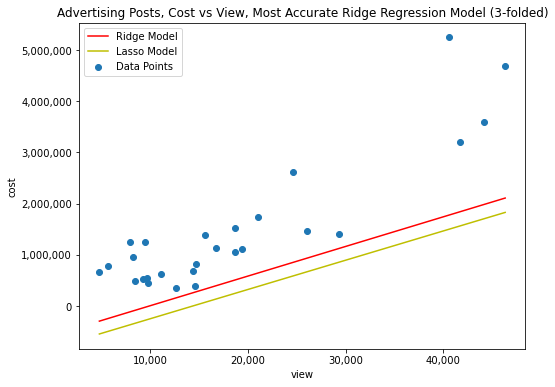

In [105]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

ax.scatter(ad_post_dummy['view'], ad_post_dummy['cost'], label='Data Points')
X_plot = np.arange(ad_post_dummy['view'].min(), ad_post_dummy['view'].max() , 1)
y_plot_ridge = ridge.intercept_[0] + (ridge.coef_[0][1]*X_plot)
y_plot_lasso = lasso.intercept_[0] + lasso.coef_[1] * X_plot
ax.plot(X_plot, y_plot_ridge, '-r', label='Ridge Model')
ax.plot(X_plot, y_plot_lasso, '-y', label='Lasso Model')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title(f'Advertising Posts, Cost vs View, Most Accurate Ridge Regression Model (3-folded)')
ax.set_xlabel('view')
ax.set_ylabel('cost')
ax.legend()
plt.show()